# Name:- Parshwa Shah
# Experiment No.:- 2
# Roll No.- 34
# UID:- 2019230071
# Batch:- B

<h2>Aim:- To implement and use Principal Component Analysis using Python Platform </h2>

<center> <h1> Principal Component Analysis </h1><center>

<h3>Importing the libraries </h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h3> Importing the dataset </h3>

In [2]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data imports-85.data

--2022-02-23 13:35:42--  https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25936 (25K) [application/x-httpd-php]
Saving to: ‘imports-85.data’

imports-85.data     100%[===================>]  25.33K  --.-KB/s    in 0.009s  

2022-02-23 13:35:42 (2.69 MB/s) - ‘imports-85.data’ saved [25936/25936]

--2022-02-23 13:35:42--  http://imports-85.data/
Resolving imports-85.data (imports-85.data)... failed: Name or service not known.
wget: unable to resolve host address ‘imports-85.data’
FINISHED --2022-02-23 13:35:42--
Total wall clock time: 0.2s
Downloaded: 1 files, 25K in 0.009s (2.69 MB/s)


In [3]:
dataset = pd.read_csv('imports-85.data') 

In [4]:
dataset

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


Attribute Information:

Attribute: Attribute Range

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

<h3> Finalize the column names </h3>

In [5]:
dataset.columns=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location',
                 'wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

In [6]:
dataset

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


<h3>Drop the symboling column </h3>

In [7]:
dataset= dataset.drop('symboling', axis = 1) 


In [8]:
dataset

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


<h3> Check for NaN values in dataset </h3>

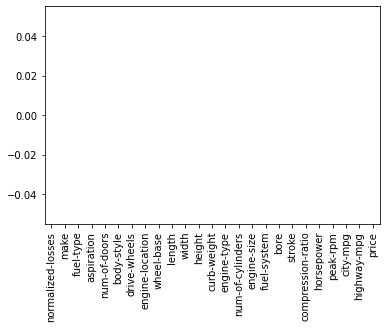

In [9]:
dataset.isna().sum().plot(kind = 'bar')

<h3> Perform the Exploratory Data Analysis </h3>

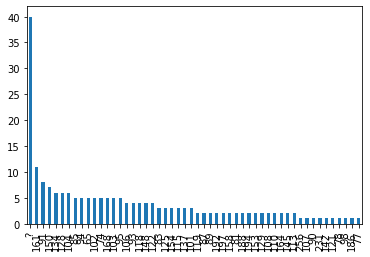

In [10]:
dataset['normalized-losses'].value_counts().plot(kind = 'bar')

In [11]:
dataset['price'].value_counts()

?        4
16500    2
7775     2
7295     2
7957     2
        ..
16503    1
5389     1
6189     1
6669     1
22625    1
Name: price, Length: 186, dtype: int64

<h3> Some columns had "?" values</h3>

In [12]:
#'?' in dataset[''].values
for col in dataset.columns:
  if '?' in dataset[col].values:
    print("col=",col)

col= normalized-losses
col= num-of-doors
col= bore
col= stroke
col= horsepower
col= peak-rpm
col= price


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until


<h3> Check count of "?" in all columns </h3>

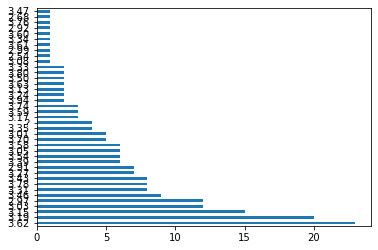

In [13]:
dataset['bore'].value_counts().plot(kind = 'barh')

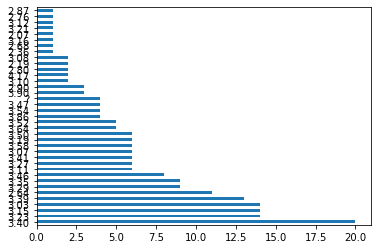

In [14]:
dataset['stroke'].value_counts().plot(kind = 'barh')

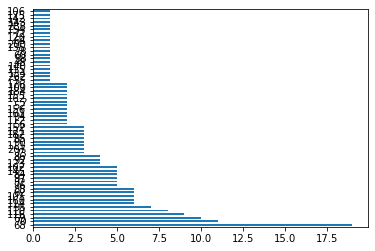

In [15]:
dataset['horsepower'].value_counts().plot(kind = 'barh')

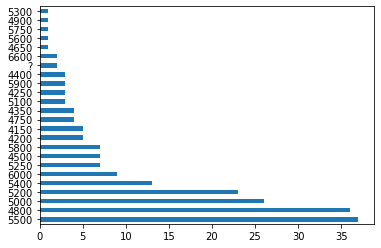

In [16]:
dataset['peak-rpm'].value_counts().plot(kind = 'barh')

In [17]:
dataset['num-of-doors'].value_counts()

four    114
two      88
?         2
Name: num-of-doors, dtype: int64

<h3> Convert "?" to NaN to get replaced with mean </h3>

In [18]:
dataset = dataset.replace('?',np.NAN) 
dataset.isnull().sum()

normalized-losses    40
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

<h3> Replace "?" with mean of column values </h3>

In [19]:
cols = ['normalized-losses', 'bore',  'stroke', 'horsepower', 'peak-rpm','price']
for col in cols:
    dataset[col]=pd.to_numeric(dataset[col])
    dataset[col].fillna(dataset[col].mean(), inplace=True)
dataset.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
3,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
4,122.0,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0


<h3> Now, no "?" or NaN values in dataset </h3>

In [20]:
"?" in dataset.values

False

In [21]:
dataset

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
3,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
4,122.0,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
200,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
201,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
202,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


<h3> Perform data visualization of some columns with 'price' column </h3>

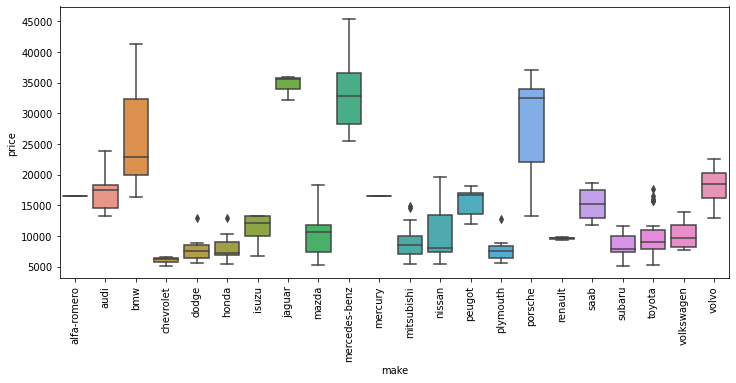

In [22]:
# price range of automobile based on the maker

plt.figure(figsize = (12,5))

sns.boxplot(x='make',y='price',data=dataset);
plt.xticks(rotation = 90)
plt.show()

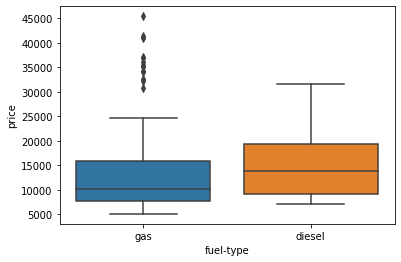

In [23]:
sns.boxplot(x='fuel-type',y='price',data=dataset)

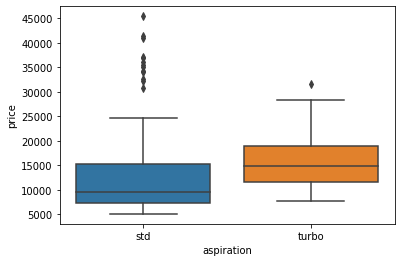

In [24]:
sns.boxplot(x='aspiration',y='price',data=dataset)

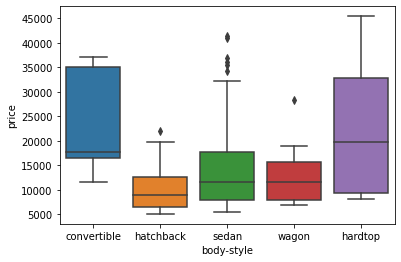

In [25]:
sns.boxplot(x='body-style',y='price',data=dataset)

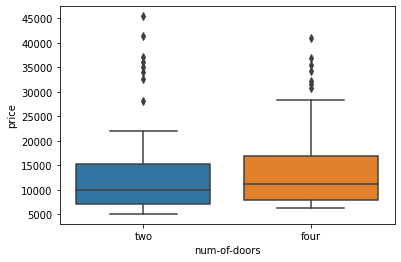

In [26]:
sns.boxplot(x='num-of-doors',y='price',data=dataset)

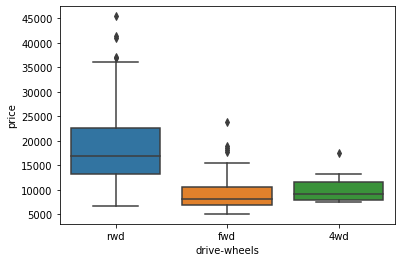

In [27]:
sns.boxplot(x='drive-wheels',y='price',data=dataset)

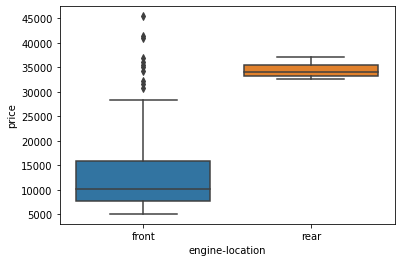

In [28]:
sns.boxplot(x='engine-location',y='price',data=dataset)

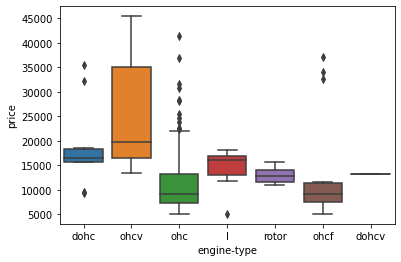

In [29]:
sns.boxplot(x='engine-type',y='price',data=dataset)

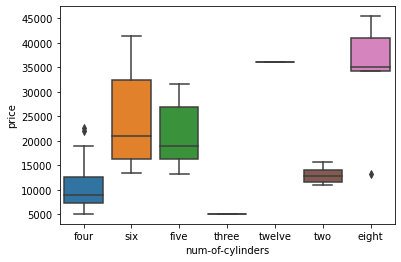

In [30]:

sns.boxplot(x='num-of-cylinders',y='price',data=dataset)

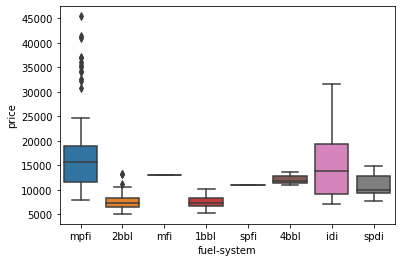

In [31]:
sns.boxplot(x='fuel-system',y='price',data=dataset)

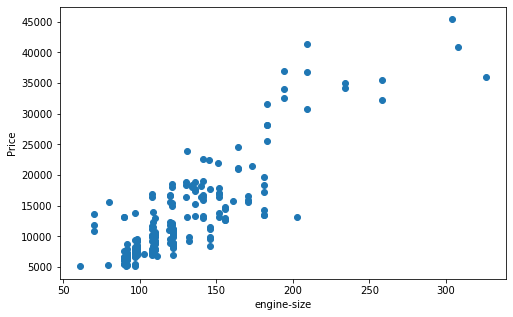

In [32]:
plt.figure(figsize=(8, 5))
plt.scatter(x='engine-size',y='price',data=dataset)
plt.xlabel('engine-size')
plt.ylabel('Price');

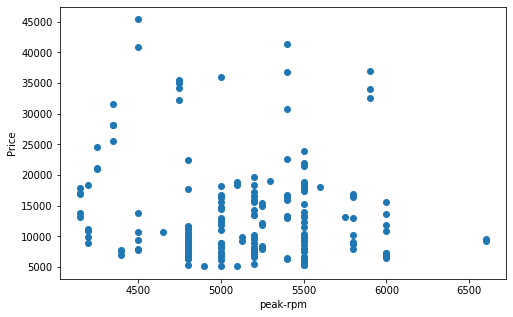

In [33]:
plt.figure(figsize=(8, 5))
plt.scatter(x='peak-rpm',y='price',data=dataset)
plt.xlabel('peak-rpm')
plt.ylabel('Price');

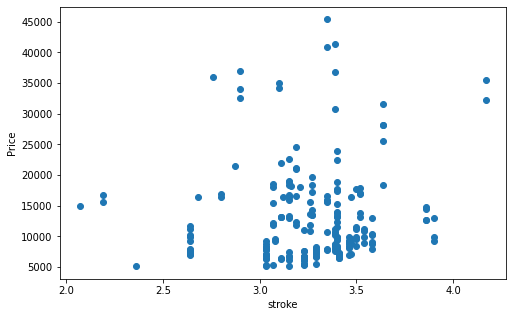

In [34]:
plt.figure(figsize=(8, 5))
plt.scatter(x='stroke',y='price',data=dataset)
plt.xlabel('stroke')
plt.ylabel('Price');

In [35]:
dataset

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
3,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
4,122.0,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
200,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
201,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
202,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


<h3> Label Encode the Categorical Data </h3>

In [36]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

dataset['make']= label_encoder.fit_transform(dataset['make'])
dataset['fuel-type']= label_encoder.fit_transform(dataset['fuel-type'])
dataset['aspiration']= label_encoder.fit_transform(dataset['aspiration'])
dataset['num-of-doors']= label_encoder.fit_transform(dataset['num-of-doors'])
dataset['body-style']= label_encoder.fit_transform(dataset['body-style'])
dataset['drive-wheels']= label_encoder.fit_transform(dataset['drive-wheels'])
dataset['engine-location']= label_encoder.fit_transform(dataset['engine-location'])
dataset['engine-type']= label_encoder.fit_transform(dataset['engine-type'])
dataset['num-of-cylinders']= label_encoder.fit_transform(dataset['num-of-cylinders'])
dataset['fuel-system']= label_encoder.fit_transform(dataset['fuel-system'])

In [37]:
dataset

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
1,122.0,0,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
2,164.0,1,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
3,164.0,1,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
4,122.0,1,1,0,1,3,1,0,99.8,177.3,66.3,53.1,2507,3,1,136,5,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,95.0,21,1,0,0,3,2,0,109.1,188.8,68.9,55.5,2952,3,2,141,5,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
200,95.0,21,1,1,0,3,2,0,109.1,188.8,68.8,55.5,3049,3,2,141,5,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
201,95.0,21,1,0,0,3,2,0,109.1,188.8,68.9,55.5,3012,5,3,173,5,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
202,95.0,21,0,1,0,3,2,0,109.1,188.8,68.9,55.5,3217,3,3,145,3,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


<h3> Plot the correlation graph </h3>

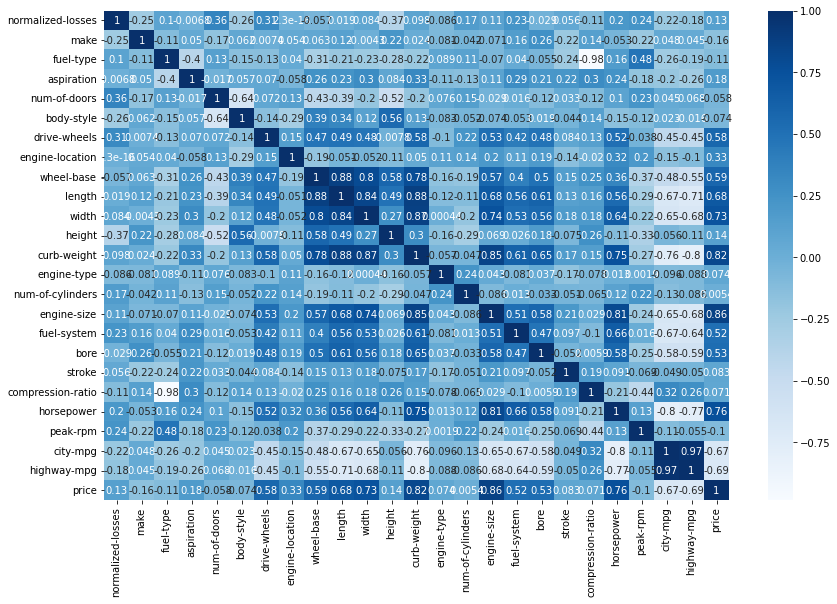

In [38]:
# plt.imshow(dataset, cmap='hot', interpolation='nearest')
# plt.show()
plt.figure(figsize = (14,9))
hm = sns.heatmap(dataset.corr(),annot=True,cmap='Blues')
  
# displaying the plotted heatmap
plt.show()


<h3> Plot the covariance matrix </h3>

In [39]:
covMatrix = pd.DataFrame.cov(dataset)
(covMatrix)

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
normalized-losses,1.008631e+03,-50.137931,0.960591,-0.083744,5.906404,-6.862069,5.507389,-2.102177e-18,-10.835468,7.544828,5.750246,-28.838916,1.620980e+03,-2.827586,4.226601,147.157635,14.615764,-0.252741,0.549998,-14.482562,255.955665,3610.344828,-45.561576,-39.073892,3.356917e+04
make,-5.013793e+01,38.831257,-0.206414,0.121028,-0.563798,0.326958,0.025500,4.056795e-02,2.367826,8.986207,-0.057964,3.342616,7.839235e+01,-0.524775,-0.207476,-18.435429,1.966773,0.437461,-0.432534,3.408211,-12.964542,-664.254012,1.958176,1.945716,-7.994417e+03
fuel-type,9.605911e-01,-0.206414,0.088863,-0.046170,0.019801,-0.036704,-0.022312,1.448855e-03,-0.550111,-0.781773,-0.149097,-0.205515,-3.381252e+01,0.027528,0.026369,-0.867768,0.024148,-0.004478,-0.022384,-1.168164,1.948056,68.077842,-0.498503,-0.392157,-2.593557e+02
aspiration,-8.374384e-02,0.121028,-0.046170,0.149208,-0.003381,0.018642,0.014923,-2.680382e-03,0.591942,1.116379,0.248194,0.078258,6.553542e+01,-0.044770,-0.041147,1.748720,0.226263,0.022439,0.026566,0.453788,3.683534,-34.047456,-0.516686,-0.682145,5.407299e+02
num-of-doors,5.906404e+00,-0.563798,0.019801,-0.003381,0.268521,-0.279436,0.020864,8.113590e-03,-1.343775,-2.489655,-0.221839,-0.659162,-5.426340e+01,0.040858,0.059983,-0.630928,0.017000,-0.017421,0.005318,-0.238959,2.092255,56.575867,0.152226,0.242345,-2.351547e+02
body-style,-6.862069e+00,0.326958,-0.036704,0.018642,-0.279436,0.707814,-0.066068,-2.897711e-02,1.955095,3.494089,0.220525,1.135594,5.764938e+01,-0.072733,-0.034773,-2.597025,-0.090505,0.004294,-0.011637,0.452406,-5.113642,-46.673658,0.124408,-0.091181,-4.899800e+02
drive-wheels,5.507389e+00,0.025500,-0.022312,0.014923,0.020864,-0.066068,0.308606,9.997102e-03,1.581179,3.366256,0.570443,-0.010519,1.673902e+02,-0.058824,0.099681,12.192698,0.472037,0.072458,0.014509,0.286813,11.395552,-10.174121,-1.629817,-1.728050,2.536071e+03
engine-location,-2.102177e-18,0.040568,0.001449,-0.002680,0.008114,-0.028977,0.009997,1.456100e-02,-0.137533,-0.076478,-0.013547,-0.031759,3.178282e+00,0.014344,0.013040,0.991742,0.025935,0.006073,-0.005295,-0.009578,1.518875,11.438570,-0.121776,-0.085265,3.151080e+02
wheel-base,-1.083547e+01,2.367826,-0.550111,0.591942,-1.343775,1.955095,1.581179,-1.375326e-01,35.929762,65.031342,10.231322,8.468258,2.445908e+03,-1.016937,-0.894842,143.625321,4.773307,0.808175,0.276296,5.946549,84.509889,-1047.458787,-18.835528,-22.862071,2.778347e+04
length,7.544828e+00,8.986207,-0.781773,1.116379,-2.489655,3.494089,3.366256,-7.647783e-02,65.031342,152.822081,22.323719,14.747734,5.665915e+03,-1.559852,-1.084236,352.891379,13.968227,2.040175,0.488340,7.771490,271.825055,-1700.615520,-54.526970,-60.260468,6.663812e+04


<h3> Divide the dataset into independent and dependent columns </h3>

In [40]:
X = dataset.iloc[:,:24]
X

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,122.0,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27
1,122.0,0,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154.0,5000.0,19,26
2,164.0,1,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102.0,5500.0,24,30
3,164.0,1,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115.0,5500.0,18,22
4,122.0,1,1,0,1,3,1,0,99.8,177.3,66.3,53.1,2507,3,1,136,5,3.19,3.40,8.5,110.0,5500.0,19,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,95.0,21,1,0,0,3,2,0,109.1,188.8,68.9,55.5,2952,3,2,141,5,3.78,3.15,9.5,114.0,5400.0,23,28
200,95.0,21,1,1,0,3,2,0,109.1,188.8,68.8,55.5,3049,3,2,141,5,3.78,3.15,8.7,160.0,5300.0,19,25
201,95.0,21,1,0,0,3,2,0,109.1,188.8,68.9,55.5,3012,5,3,173,5,3.58,2.87,8.8,134.0,5500.0,18,23
202,95.0,21,0,1,0,3,2,0,109.1,188.8,68.9,55.5,3217,3,3,145,3,3.01,3.40,23.0,106.0,4800.0,26,27


In [41]:
y = dataset.iloc[:,24:]
y

,price
0,16500.0
1,16500.0
2,13950.0
3,17450.0
4,15250.0
...,...
199,16845.0
200,19045.0
201,21485.0
202,22470.0


<h3> Perform MinMax Normalization </h3>

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X)
#y=scaler.fit_transform(y)
X

array([[0.29842932, 0.        , 1.        , ..., 0.34693878, 0.22222222,
        0.28947368],
       [0.29842932, 0.        , 1.        , ..., 0.34693878, 0.16666667,
        0.26315789],
       [0.51832461, 0.04761905, 1.        , ..., 0.55102041, 0.30555556,
        0.36842105],
       ...,
       [0.15706806, 1.        , 1.        , ..., 0.55102041, 0.13888889,
        0.18421053],
       [0.15706806, 1.        , 0.        , ..., 0.26530612, 0.36111111,
        0.28947368],
       [0.15706806, 1.        , 1.        , ..., 0.51020408, 0.16666667,
        0.23684211]])

In [43]:
y

,price
0,16500.0
1,16500.0
2,13950.0
3,17450.0
4,15250.0
...,...
199,16845.0
200,19045.0
201,21485.0
202,22470.0


<h3> Split the dataset into 80% training set and 20% in test set </h3>

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=66)

In [45]:
X_train.shape

(163, 24)

In [46]:
y_train

,price
58,8845.0
151,6488.0
11,20970.0
73,45400.0
134,15510.0
...,...
122,8921.0
51,6795.0
119,6229.0
60,10595.0


<h3> Train the Linear Regression model and print the summary and results </h3>

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
print("MAE=",mean_absolute_error(y_test,y_pred))
print("MSE=",mean_squared_error(y_test,y_pred))
print("R2 Score=",r2_score(y_test,y_pred))

MAE= 2470.9988009165318
MSE= 12397448.396901723
R2 Score= 0.7187884111561771


<h3> Do parameter tuning and get the results of PCA on regression model for different number of components  </h3>

PCA for 1 Components is 
 [[ 0.02163731  0.08621773 -0.09350814  0.28222292 -0.10414147  0.04878172
   0.31920124  0.01851734  0.2420575   0.28704235  0.26351904  0.11068077
   0.33242663 -0.02969443 -0.01369459  0.21606512  0.41078509  0.24497966
   0.0343563   0.04601252  0.225505   -0.06981753 -0.24280905 -0.24610697]]
PCA for 2 Components is 
 [[ 0.02163731  0.08621773 -0.09350814  0.28222292 -0.10414147  0.04878172
   0.31920124  0.01851734  0.2420575   0.28704235  0.26351904  0.11068077
   0.33242663 -0.02969443 -0.01369459  0.21606512  0.41078509  0.24497966
   0.0343563   0.04601252  0.225505   -0.06981753 -0.24280905 -0.24610697]
 [-0.17746556  0.23158432 -0.48961834  0.40527616 -0.23216201  0.17539509
  -0.1954845  -0.06778763  0.06554727  0.01587649 -0.00420029  0.18737948
  -0.03337377 -0.05856632 -0.07846241 -0.08692118 -0.14818456 -0.05786978
   0.01546402  0.40760984 -0.15977803 -0.22599279  0.18266813  0.1543801 ]]
PCA for 3 Components is 
 [[ 0.02163731  0.08621773 -0.

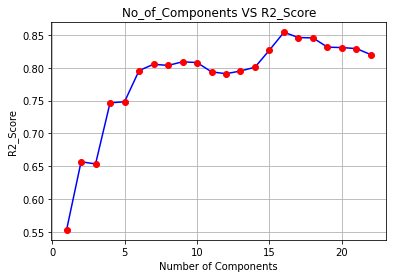

In [57]:
from sklearn.decomposition import PCA

i_value=[]
r2_value=[]
mae_value=[]
for i in range(1,23):
    # Applying PCA
    pca = PCA(n_components = i)
    X_train1 = pca.fit_transform(X_train)
    X_test1 = pca.transform(X_test)
    comp_results = pca.components_
    print(f"PCA for {i} Components is \n {pca.components_}")
    # Training And Testing the model
    regressor = LinearRegression()
    regressor.fit(X_train1,y_train)
    y_pred = regressor.predict(X_test1)
    mae_value.append(mean_absolute_error(y_test,y_pred))
    r2_value.append(r2_score(y_pred,y_test).round(4))
    i_value.append(i)
    
# Plotting the r2 Score with each number of component for PCA
plt.plot(i_value,r2_value,marker='o',mfc='red',mec='red',color='blue')
plt.xlabel('Number of Components')
plt.ylabel('R2_Score')
plt.title('No_of_Components VS R2_Score')
plt.grid(b=None)
plt.show()



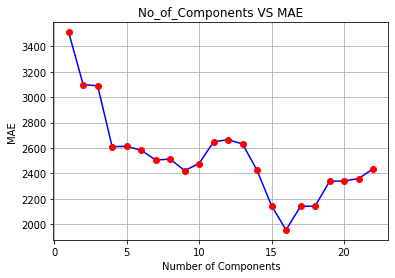

In [58]:
# Plotting the r2 Score with different number of components for PCA
plt.plot(i_value,mae_value,marker='o',mfc='red',mec='red',color='blue')
plt.xlabel('Number of Components')
plt.ylabel('MAE')
plt.title('No_of_Components VS MAE')
plt.grid(b=None)
plt.show()

<h3> When components are 16, R2 score is the highest and MAE is the lowest. </h3>

<h3> Conclusion: Hence, from this experiment, I understood the concept of PCA and how dimensionality reduction can help in improvising the model. Also, I performed PCA on Automobile dataset and did dimensionality reduction.</h3>